In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt
# Standard
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import seaborn as sns
# Sklearn tools
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
# PATH and setup
import os

In [2]:
df = pd.read_csv("./feature2.csv", delimiter=',', header=0)

In [3]:
df

,Unnamed: 0,relapse,age,wbc,01_HSC_Basal_ab,01_HSC_CD19_Basal_dp,01_HSC_CD20_Basal_dp,01_HSC_CD24_Basal_dp,01_HSC_CD34_Basal_dp,01_HSC_CD38_Basal_dp,...,15_Mature_Non_B_Pax5_Basal_fc,15_Mature_Non_B_CD43_Basal_fc,15_Mature_Non_B_HLADR_Basal_fc,15_Mature_Non_B_p4EBP1_Basal_fc,15_Mature_Non_B_pSTAT5_Basal_fc,15_Mature_Non_B_pPLCg1_2_Basal_fc,15_Mature_Non_B_pSyk_Basal_fc,15_Mature_Non_B_pS6_Basal_fc,15_Mature_Non_B_pErk_Basal_fc,15_Mature_Non_B_pCreb_Basal_fc
0,ALL05v2_UPN90_Basal,1.0,7.0,NaN,0.743051,36.783580,5.938494,28.773280,86.73356,3.495261,...,0.024691,4.893595,0.518631,0.039409,0.005735,0.059088,0.639269,0.067299,0.100983,0.208523
1,ALL05v2_UPN90_IL7,1.0,7.0,NaN,0.751300,37.997150,8.470795,-4.926860,86.11830,-43.778230,...,0.556650,0.995922,0.948475,1.194332,66.356337,0.965727,1.005474,0.954747,1.018380,0.918681
2,ALL05v2_UPN90_TSLP,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALL05v2_UPN90_BCR,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALL05v2_UPN90_PVO4,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,StJude_TB071997_BCR,NaN,NaN,NaN,0.146755,-0.038168,0.000000,1.618383,93.40446,-34.085850,...,1.131922,0.967686,0.941049,4.482947,10.676653,14.638435,4.494824,1.583317,2.232776,1.591483
900,StJude_TB071997_PVO4,NaN,NaN,NaN,0.152260,3.136435,0.000000,1.514298,88.85072,-34.931540,...,1.421659,0.855092,1.189671,5.106758,19.796046,19.569744,5.226742,1.743546,4.908145,1.200774
901,StJude_TB071997_BEZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,StJude_TB071997_Das,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.rename(columns={ df.columns[0]: "Patient_Id" }, inplace = True)

In [5]:
df

,Patient_Id,relapse,age,wbc,01_HSC_Basal_ab,01_HSC_CD19_Basal_dp,01_HSC_CD20_Basal_dp,01_HSC_CD24_Basal_dp,01_HSC_CD34_Basal_dp,01_HSC_CD38_Basal_dp,...,15_Mature_Non_B_Pax5_Basal_fc,15_Mature_Non_B_CD43_Basal_fc,15_Mature_Non_B_HLADR_Basal_fc,15_Mature_Non_B_p4EBP1_Basal_fc,15_Mature_Non_B_pSTAT5_Basal_fc,15_Mature_Non_B_pPLCg1_2_Basal_fc,15_Mature_Non_B_pSyk_Basal_fc,15_Mature_Non_B_pS6_Basal_fc,15_Mature_Non_B_pErk_Basal_fc,15_Mature_Non_B_pCreb_Basal_fc
0,ALL05v2_UPN90_Basal,1.0,7.0,NaN,0.743051,36.783580,5.938494,28.773280,86.73356,3.495261,...,0.024691,4.893595,0.518631,0.039409,0.005735,0.059088,0.639269,0.067299,0.100983,0.208523
1,ALL05v2_UPN90_IL7,1.0,7.0,NaN,0.751300,37.997150,8.470795,-4.926860,86.11830,-43.778230,...,0.556650,0.995922,0.948475,1.194332,66.356337,0.965727,1.005474,0.954747,1.018380,0.918681
2,ALL05v2_UPN90_TSLP,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALL05v2_UPN90_BCR,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALL05v2_UPN90_PVO4,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,StJude_TB071997_BCR,NaN,NaN,NaN,0.146755,-0.038168,0.000000,1.618383,93.40446,-34.085850,...,1.131922,0.967686,0.941049,4.482947,10.676653,14.638435,4.494824,1.583317,2.232776,1.591483
900,StJude_TB071997_PVO4,NaN,NaN,NaN,0.152260,3.136435,0.000000,1.514298,88.85072,-34.931540,...,1.421659,0.855092,1.189671,5.106758,19.796046,19.569744,5.226742,1.743546,4.908145,1.200774
901,StJude_TB071997_BEZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,StJude_TB071997_Das,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ddpr = ['UPN1','UPN2','UPN3','UPN6','UPN7','UPN8','UPN9','UPN10','UPN11','UPN12','UPN13','UPN15','UPN16',
        'UPN17','UPN18','UPN19','UPN21','UPN22','UPN23','UPN24','UPN25','UPN26','UPN27','UPN28','UPN29',
        'UPN31','UPN35','UPN47','UPN48','UPN49','UPN50','UPN52','UPN53','UPN54','UPN55','UPN56','UPN58',
        'UPN90','UPN91','UPN92','UPN93','UPN96','UPN97','UPN98']

In [7]:
ddpr_test = ['UPN4','UPN5','UPN14','UPN20','UPN30','UPN45','UPN51','UPN57','UPN94','UPN95']

In [8]:
df['Patient_Id']

0       ALL05v2_UPN90_Basal
1         ALL05v2_UPN90_IL7
2        ALL05v2_UPN90_TSLP
3         ALL05v2_UPN90_BCR
4        ALL05v2_UPN90_PVO4
               ...         
899     StJude_TB071997_BCR
900    StJude_TB071997_PVO4
901     StJude_TB071997_BEZ
902     StJude_TB071997_Das
903     StJude_TB071997_TOF
Name: Patient_Id, Length: 904, dtype: object

In [9]:
df_ddpr = df[df['Patient_Id'].str.contains("|".join(ddpr))]

In [10]:
df_ddpr.index=df_ddpr['Patient_Id']

In [11]:
df_ddpr=df_ddpr.drop(df.columns[[0,2,3]], axis=1)

In [12]:
df_ddpr_test = df[df['Patient_Id'].str.contains("|".join(ddpr_test))]

In [13]:
df_ddpr_test.index=df_ddpr_test['Patient_Id']

In [14]:
df_ddpr_test=df_ddpr_test.drop(df.columns[[0]], axis=1)

In [15]:
df_ddpr_test=df_ddpr_test.drop(df.columns[[1]], axis=1)

In [16]:
from pycaret.classification import *

In [17]:
exp_reg = setup(data = df_ddpr, target = 'relapse', imputation_type = 'simple', normalize = True, pca = False,  normalize_method = 'minmax', session_id=123) 

,Description,Value
0,Session id,123
1,Target,relapse
2,Target type,Binary
3,Original data shape,"(416, 856)"
4,Transformed data shape,"(416, 856)"
5,Transformed train set shape,"(291, 856)"
6,Transformed test set shape,"(125, 856)"
7,Numeric features,855
8,Rows with missing values,30.8%
9,Preprocess,True


In [18]:
compare_models(exclude = ['catboost', 'xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8903,0.0000,0.7191,0.9732,0.8208,0.7464,0.7689,0.1710
lda,Linear Discriminant Analysis,0.8834,0.9517,0.7282,0.9382,0.8141,0.7330,0.7496,0.0800
lr,Logistic Regression,0.8732,0.9458,0.6991,0.9357,0.7960,0.7082,0.7271,0.4900
lightgbm,Light Gradient Boosting Machine,0.8729,0.9490,0.6909,0.9458,0.7902,0.7055,0.7284,0.2800
et,Extra Trees Classifier,0.8661,0.9491,0.6536,0.9746,0.7717,0.6860,0.7200,0.1320
rf,Random Forest Classifier,0.8628,0.9482,0.6445,0.9746,0.7669,0.6787,0.7130,0.1420
gbc,Gradient Boosting Classifier,0.8626,0.9430,0.6809,0.9253,0.7747,0.6822,0.7051,0.6300
svm,SVM - Linear Kernel,0.8421,0.0000,0.7345,0.8778,0.7707,0.6544,0.6863,0.0440
ada,Ada Boost Classifier,0.8318,0.9132,0.6518,0.8524,0.7355,0.6164,0.6304,0.1910
dt,Decision Tree Classifier,0.8043,0.8353,0.6164,0.8125,0.6893,0.5539,0.5731,0.0700


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [25]:
ml = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9569,0.5455,1.0000,0.7059,0.6032,0.6571
1,0.8276,0.9553,0.6000,0.8571,0.7059,0.5892,0.6080
2,0.9310,0.9684,0.8000,1.0000,0.8889,0.8398,0.8508
3,0.8966,0.9684,0.8000,0.8889,0.8421,0.7655,0.7678
4,0.8966,0.9579,0.7000,1.0000,0.8235,0.7535,0.7775
5,0.8966,0.9874,0.7273,1.0000,0.8421,0.7680,0.7895
6,0.7931,0.8687,0.4545,1.0000,0.6250,0.5085,0.5839
7,0.7931,0.8990,0.4545,1.0000,0.6250,0.5085,0.5839
8,0.9655,0.9899,0.9091,1.0000,0.9524,0.9254,0.9280


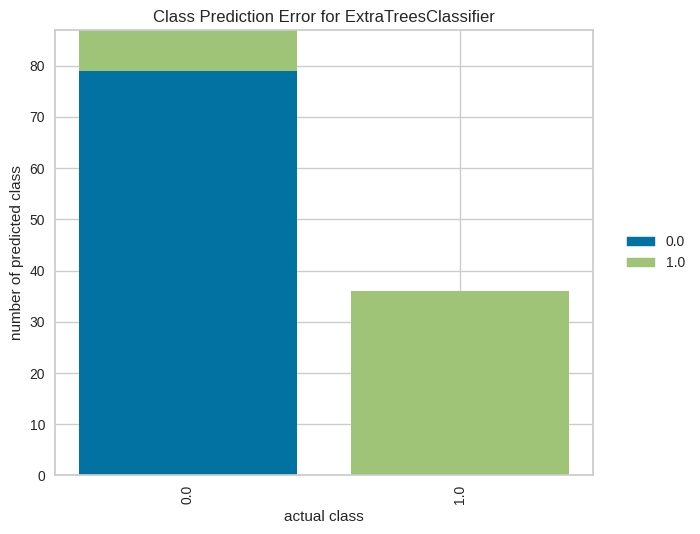

In [26]:
plot_model(ml, plot = 'error')

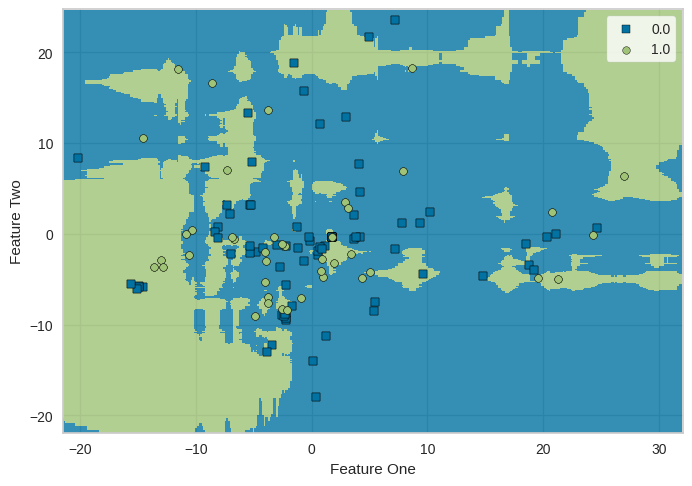

In [27]:
plot_model(ml, plot='boundary')

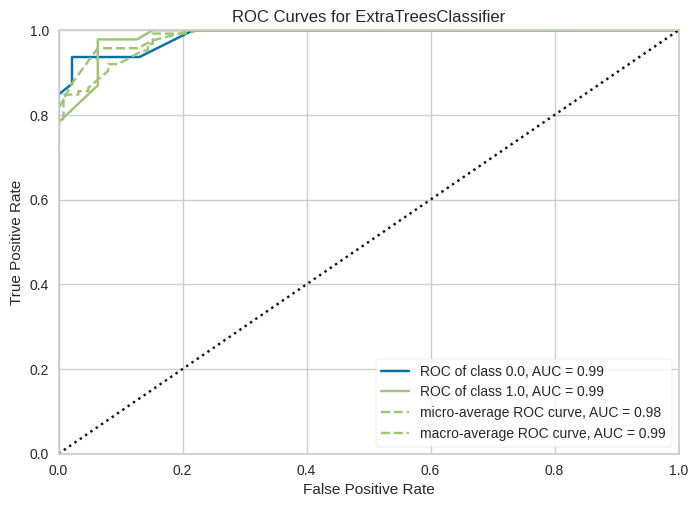

In [28]:
plot_model(ml)

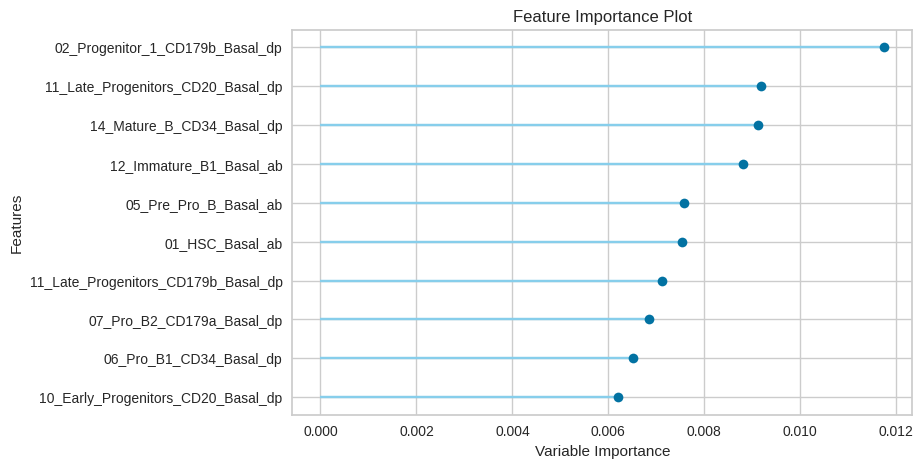

In [29]:
plot_model(ml, plot = 'feature')

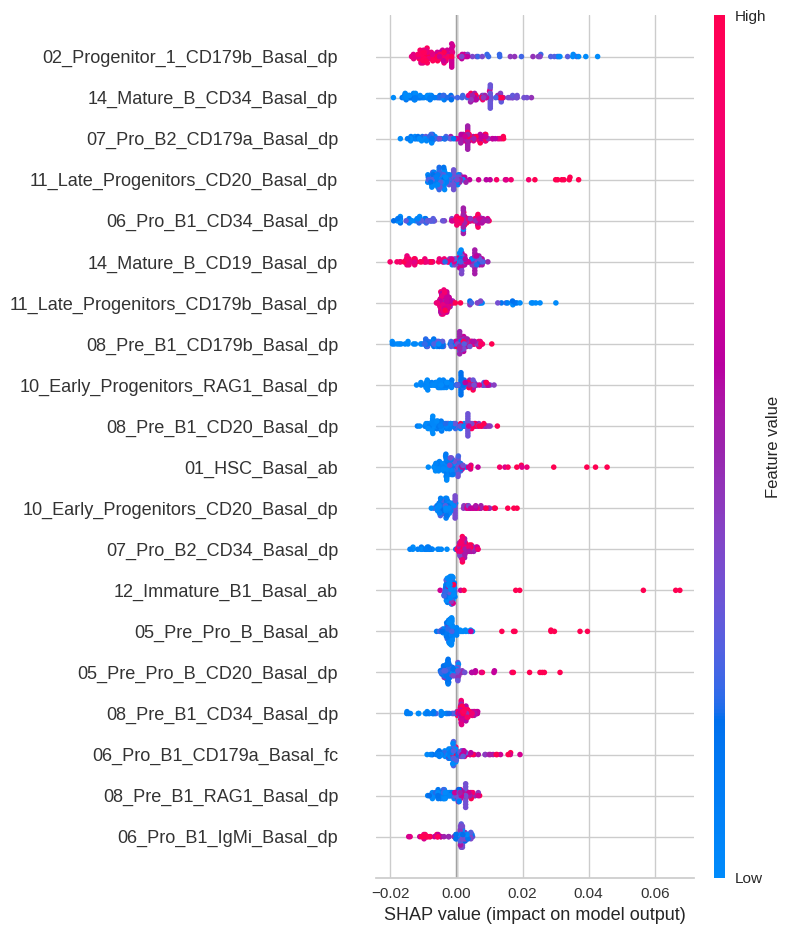

In [30]:
interpret_model(ml,plot = 'summary')

In [25]:
out=predict_model(ml)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9360,0.9840,0.8261,1.0000,0.9048,0.8572,0.8661


In [26]:
out

,01_HSC_Basal_ab,01_HSC_CD19_Basal_dp,01_HSC_CD20_Basal_dp,01_HSC_CD24_Basal_dp,01_HSC_CD34_Basal_dp,01_HSC_CD38_Basal_dp,01_HSC_CD127_Basal_dp,01_HSC_CD179a_Basal_dp,01_HSC_CD179b_Basal_dp,01_HSC_IgMi_Basal_dp,...,15_Mature_Non_B_p4EBP1_Basal_fc,15_Mature_Non_B_pSTAT5_Basal_fc,15_Mature_Non_B_pPLCg1_2_Basal_fc,15_Mature_Non_B_pSyk_Basal_fc,15_Mature_Non_B_pS6_Basal_fc,15_Mature_Non_B_pErk_Basal_fc,15_Mature_Non_B_pCreb_Basal_fc,relapse,prediction_label,prediction_score
Patient_Id,,,,,,,,,,,,,,,,,,,,,
ALL08_UPN21_IL7,1.916409,14.683780,13.229460,-45.643570,59.359051,-28.586370,-0.901876,18.264191,-2.207870,9.711018,...,1.024715,0.709418,1.021391,1.077250,0.989822,1.614467,1.060122,1.0,1,0.9190
CRLF2_UPN56_TOF,0.415111,8.225302,-2.876106,-42.300980,70.447792,-20.779570,-39.289650,5.142484,-1.705943,-5.321546,...,1.128969,1.077111,1.040769,1.222357,0.635618,1.382020,1.966650,1.0,1,0.8542
ALL05v2_UPN96_IL7,0.423716,32.679520,9.655682,0.803038,78.116096,-29.176279,-4.371739,0.435778,-0.116012,22.395910,...,0.968500,3.485000,1.190302,1.057158,0.966281,0.971939,0.975952,0.0,0,0.7998
ALL05v2_UPN90_Basal,0.743051,36.783581,5.938494,28.773279,86.733559,3.495261,3.206997,1.142857,0.623053,5.159475,...,0.039409,0.005735,0.059088,0.639269,0.067299,0.100983,0.208523,1.0,0,0.8972
ALL08_UPN14_TOF,1.756092,24.430210,14.571520,-38.922680,70.272141,-22.802311,-5.224274,7.546580,-3.540147,4.188284,...,1.054614,1.114030,1.050161,1.577133,0.919713,1.625485,0.937707,1.0,1,0.8958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRLF2_UPN50_BCR,0.213123,13.456460,3.862380,-4.056612,55.081310,-19.008680,-34.803001,23.066540,-2.283105,13.024720,...,0.754909,0.422667,3.500351,0.598076,108.179306,0.824503,3.292381,0.0,0,0.9586
ALL08_UPN24_BCR,0.124836,3.716622,13.569400,-52.635231,76.018921,-41.525620,-5.506588,17.508751,-2.347341,4.347111,...,2.953365,86.719330,24.308317,3.673649,1.549884,5.302162,1.959483,0.0,0,0.7597
DxRx_UPN35_Basal,0.026104,28.571430,0.000000,0.000000,71.428574,0.000000,14.285710,0.000000,0.000000,42.857140,...,0.197290,0.371097,0.552497,0.737337,1.152048,0.249143,1.036315,1.0,0,0.7494


In [27]:
out.to_csv('out1-lr.csv')

In [28]:
predictions = predict_model(ml, data = df_ddpr_test)
predictions

,age,wbc,01_HSC_Basal_ab,01_HSC_CD19_Basal_dp,01_HSC_CD20_Basal_dp,01_HSC_CD24_Basal_dp,01_HSC_CD34_Basal_dp,01_HSC_CD38_Basal_dp,01_HSC_CD127_Basal_dp,01_HSC_CD179a_Basal_dp,...,15_Mature_Non_B_HLADR_Basal_fc,15_Mature_Non_B_p4EBP1_Basal_fc,15_Mature_Non_B_pSTAT5_Basal_fc,15_Mature_Non_B_pPLCg1_2_Basal_fc,15_Mature_Non_B_pSyk_Basal_fc,15_Mature_Non_B_pS6_Basal_fc,15_Mature_Non_B_pErk_Basal_fc,15_Mature_Non_B_pCreb_Basal_fc,prediction_label,prediction_score
Patient_Id,,,,,,,,,,,,,,,,,,,,,
ALL05v2_UPN94_Basal,8.0,143000.0,13.559730,5.368448,0.151937,6.457331,74.373260,0.000000,0.050646,0.253229,...,2.112854,0.048912,0.025951,0.009558,0.037377,0.298315,0.033889,0.525767,1,0.7763
ALL05v2_UPN94_IL7,8.0,143000.0,13.160080,4.901838,0.083860,-11.683370,78.706802,-4.680619,-0.049301,0.171607,...,1.074568,1.225588,1.900304,1.259585,1.447840,0.981759,1.052671,1.201086,1,0.9248
ALL05v2_UPN94_TSLP,8.0,143000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.6580
ALL05v2_UPN94_BCR,8.0,143000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.6580
ALL05v2_UPN94_PVO4,8.0,143000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.6580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DxRx_UPN45_BCR,6.0,59910.0,0.048234,23.529409,0.000000,3.189727,76.470589,-2.816901,0.124275,5.882353,...,0.871743,1.768761,1.675136,2.427836,1.571293,1.188300,1.465317,0.828532,1,0.9442
DxRx_UPN45_PVO4,6.0,59910.0,0.053304,30.952379,4.761905,8.651911,88.095238,-2.816901,-2.816901,4.761905,...,0.962074,1.086413,3.920213,4.606029,1.752191,1.534476,1.784664,0.636504,1,0.6453
DxRx_UPN45_BEZ,6.0,59910.0,0.033410,11.111110,7.407407,5.477308,92.592590,0.886802,0.886802,0.000000,...,0.921100,1.119113,1.324977,1.261593,1.100552,1.380307,1.651610,0.820856,1,0.5112


In [29]:
predictions.to_csv('out2-lr.csv')